In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lf_frame = pd.read_csv("label_flipping_experiments.csv")
steg_frame = pd.read_csv("steganography_experiments.csv")
occl_frame = pd.read_csv("occlusion_experiments.csv")

In [3]:
steg_frame.drop(steg_frame.columns[7:], axis=1, inplace=True)
lf_frame.drop(columns=["Train_Loss", "Train_Acc", "Test_Loss", "Test_Acc", "Processing_Time", "Train_Loss.1", "Train_Acc.1", "Test_Loss.1", "Test_Acc.1", "Processing_Time.1"], axis=1, inplace=True)
occl_frame.drop(columns=["Train_Loss", "Train_Acc", "Test_Loss", "Test_Acc", "Processing_Time", "Train_Loss.1", "Train_Acc.1", "Test_Loss.1", "Test_Acc.1", "Processing_Time.1"], axis=1, inplace=True)

In [4]:
# newframe.replace('#DIV/0!', np.nan, inplace=True)
dtypes = {
    'poisoned nodes': int,
    'Model poisoning': int,
    'Processing Time': float,
    'Training Accuracy': float,
    'Training Loss': float,
    'Test Accuracy': float,
    'Test Loss': float
}
steg_frame = steg_frame.astype(dtypes)
occl_frame = occl_frame.astype(dtypes)
lf_frame = lf_frame.astype(dtypes)

In [5]:
x = steg_frame.groupby('poisoned nodes').mean().index
aggr_steg_frame = steg_frame.groupby('poisoned nodes').mean().drop(columns=['Model poisoning'])
aggr_occl_frame = occl_frame.groupby('poisoned nodes').mean().drop(columns=['Model poisoning'])
aggr_lf_frame = lf_frame.groupby('poisoned nodes').mean().drop(columns=['Model poisoning'])

y_steg = {'Training Accuracy': [], 'Training Loss': [], 'Test Accuracy': [], 'Test Loss': [], 'Processing Time': []}
y_occl = {'Training Accuracy': [], 'Training Loss': [], 'Test Accuracy': [], 'Test Loss': [], 'Processing Time': []}
y_lf = {'Training Accuracy': [], 'Training Loss': [], 'Test Accuracy': [], 'Test Loss': [], 'Processing Time': []}

for row_idx in x:
    y_steg['Training Accuracy'].append(aggr_steg_frame.iloc[row_idx]['Training Accuracy'])
    y_steg['Training Loss'].append(aggr_steg_frame.iloc[row_idx]['Training Loss'])
    y_steg['Test Accuracy'].append(aggr_steg_frame.iloc[row_idx]['Test Accuracy'])
    y_steg['Test Loss'].append(aggr_steg_frame.iloc[row_idx]['Test Loss'])
    y_steg['Processing Time'].append(aggr_steg_frame.iloc[row_idx]['Processing Time'])

    y_occl['Training Accuracy'].append(aggr_occl_frame.iloc[row_idx]['Training Accuracy'])
    y_occl['Training Loss'].append(aggr_occl_frame.iloc[row_idx]['Training Loss'])
    y_occl['Test Accuracy'].append(aggr_occl_frame.iloc[row_idx]['Test Accuracy'])
    y_occl['Test Loss'].append(aggr_occl_frame.iloc[row_idx]['Test Loss'])
    y_occl['Processing Time'].append(aggr_occl_frame.iloc[row_idx]['Processing Time'])

    y_lf['Training Accuracy'].append(aggr_lf_frame.iloc[row_idx]['Training Accuracy'])
    y_lf['Training Loss'].append(aggr_lf_frame.iloc[row_idx]['Training Loss'])
    y_lf['Test Accuracy'].append(aggr_lf_frame.iloc[row_idx]['Test Accuracy'])
    y_lf['Test Loss'].append(aggr_lf_frame.iloc[row_idx]['Test Loss'])
    y_lf['Processing Time'].append(aggr_lf_frame.iloc[row_idx]['Processing Time'])

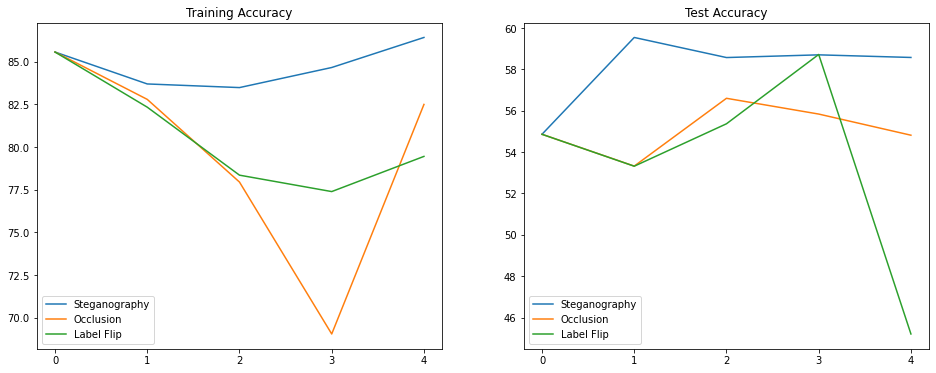

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

axs[0].plot(x, y_steg['Training Accuracy'], label='Steganography')
axs[0].plot(x, y_occl['Training Accuracy'], label='Occlusion')
axs[0].plot(x, y_lf['Training Accuracy'], label='Label Flip')
axs[0].set_xticks(x)
axs[0].set_title('Training Accuracy')
axs[0].legend()

axs[1].plot(x, y_steg['Test Accuracy'], label='Steganography')
axs[1].plot(x, y_occl['Test Accuracy'], label='Occlusion')
axs[1].plot(x, y_lf['Test Accuracy'], label='Label Flip')
axs[1].set_xticks(x)
axs[1].set_title('Test Accuracy')
axs[1].legend()
plt.show()

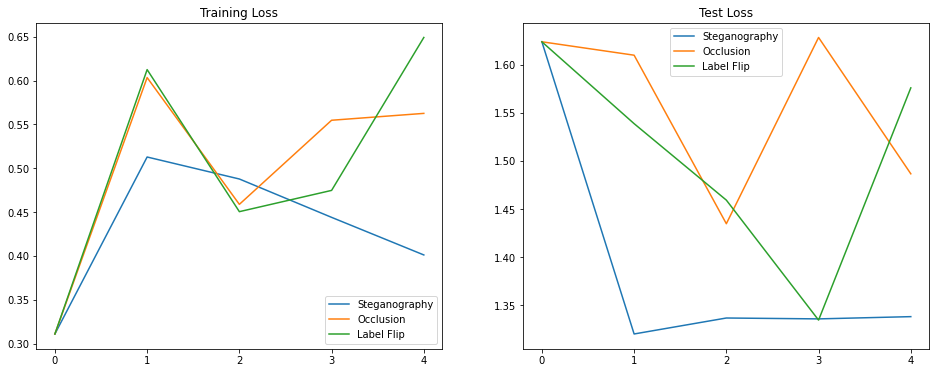

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

axs[0].plot(x, y_steg['Training Loss'], label='Steganography')
axs[0].plot(x, y_occl['Training Loss'], label='Occlusion')
axs[0].plot(x, y_lf['Training Loss'], label='Label Flip')
axs[0].set_xticks(x)
axs[0].set_title('Training Loss')
axs[0].legend()

axs[1].plot(x, y_steg['Test Loss'], label='Steganography')
axs[1].plot(x, y_occl['Test Loss'], label='Occlusion')
axs[1].plot(x, y_lf['Test Loss'], label='Label Flip')
axs[1].set_xticks(x)
axs[1].set_title('Test Loss')
axs[1].legend()
plt.show()

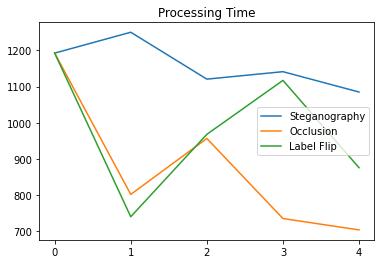

In [8]:
plt.plot(x, y_steg['Processing Time'], label='Steganography')
plt.plot(x, y_occl['Processing Time'], label='Occlusion')
plt.plot(x, y_lf['Processing Time'], label='Label Flip')
plt.xticks(x)
plt.title('Processing Time')
plt.legend()
plt.show()